ANALYSE DES DONNÉES

--- SURFACES BÂTIES ---

Statistiques pour Surfaces bâties 2015:
  Valeurs par pixel (données brutes):
    Min: 0.0 m²
    Max: 7671.0 m²
    Moyenne: 117.2 m²
    Somme totale: 532,035,866 m²
  Superficie bâtie totale: 532.04 km²
  Densité moyenne de bâti: 1.2% du pixel
  (Chaque pixel = 0.01 km² = 1 hectare)
  Résolution: 100.0m × 100.0m
  Nombre de pixels valides: 4,538,368

Statistiques pour Surfaces bâties 2025:
  Valeurs par pixel (données brutes):
    Min: 0.0 m²
    Max: 10000.0 m²
    Moyenne: 173.3 m²
    Somme totale: 786,510,728 m²
  Superficie bâtie totale: 786.51 km²
  Densité moyenne de bâti: 1.7% du pixel
  (Chaque pixel = 0.01 km² = 1 hectare)
  Résolution: 100.0m × 100.0m
  Nombre de pixels valides: 4,538,368

--- POPULATION ---

Statistiques pour Population 2015:
  Valeurs par pixel (données brutes):
    Min: 0.0 personnes
    Max: 196.4 personnes
    Moyenne: 6.3 personnes
    Somme totale: 11,501,398 personnes
  Résolution: 0.00083333° × 0.0008

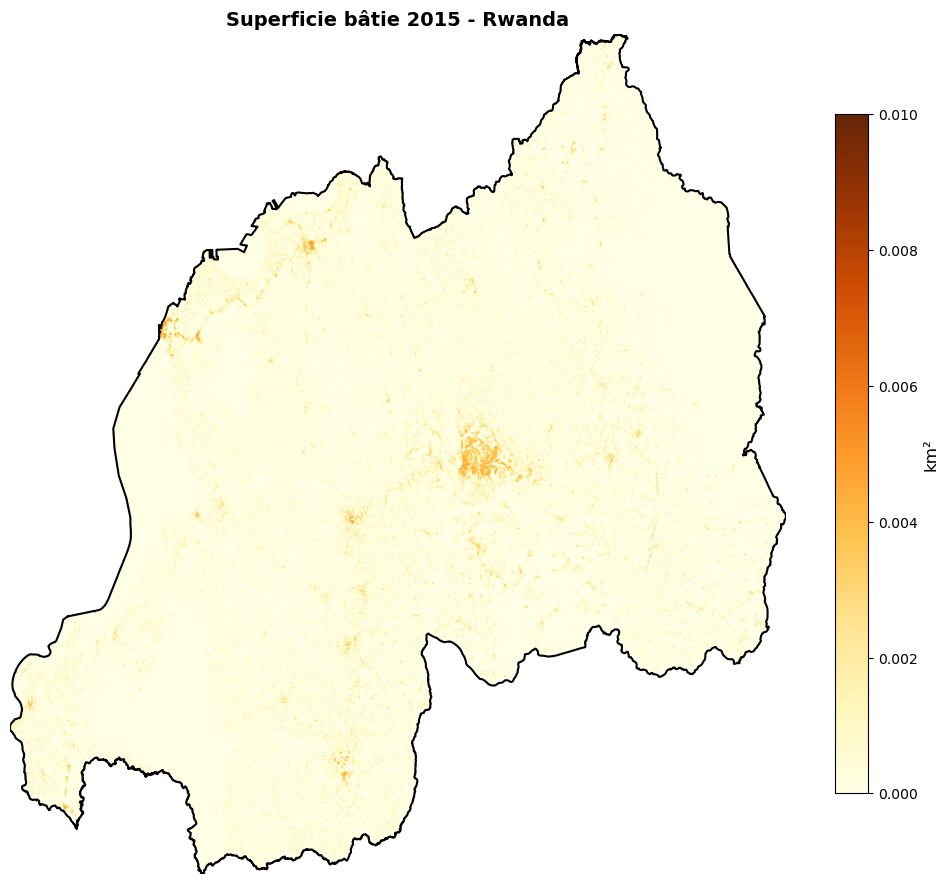

Sauvegardé: outputs\BuiltUp_2025_km2.png


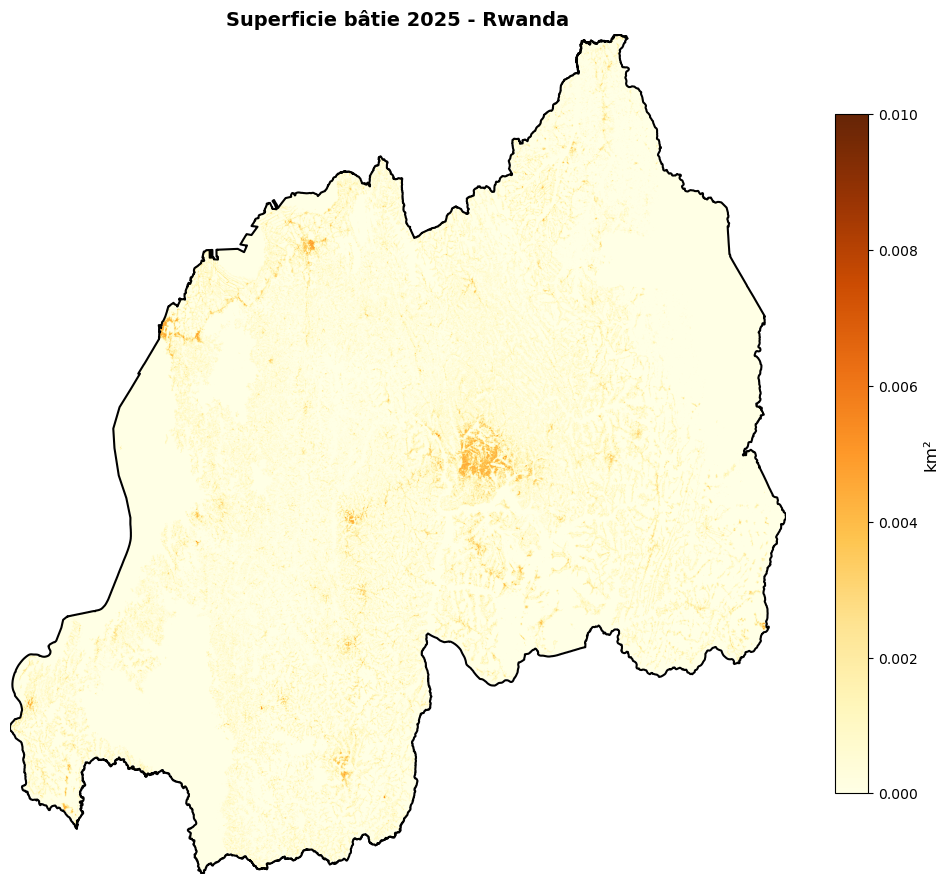

Sauvegardé: outputs\Population_2015.png


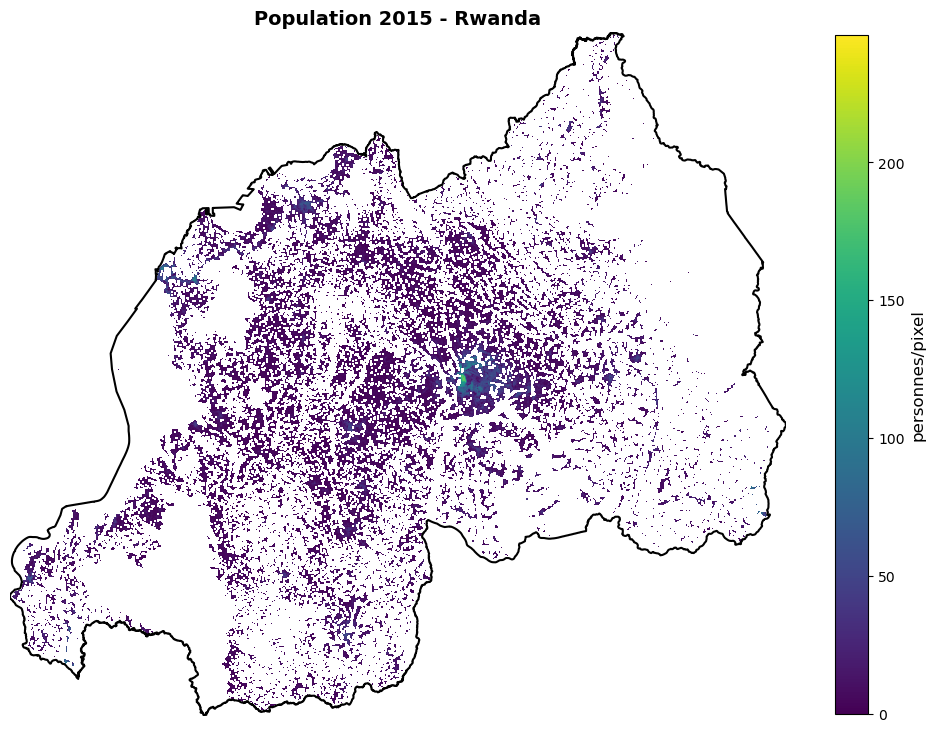

Sauvegardé: outputs\Population_2025.png


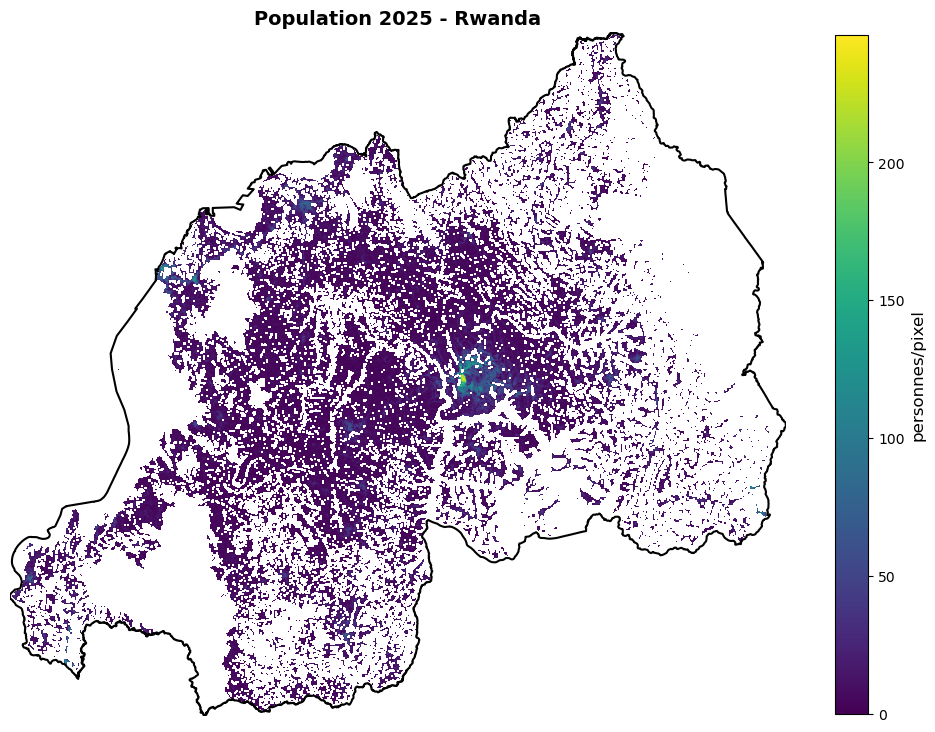

In [1]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import os
from rasterio.plot import plotting_extent

# Dossiers
data_dir = "data"
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# Chemins
built_2015_path = os.path.join(data_dir, "Rwanda_BuiltUp_2015.tif")
built_2025_path = os.path.join(data_dir, "Rwanda_BuiltUp_2025.tif")
pop_2015_path = os.path.join(data_dir, "rwa_pop_2015_CN_100m_R2025A_v1.tif")
pop_2025_path = os.path.join(data_dir, "rwa_pop_2025_CN_100m_R2025A_v1.tif")
gadm_path = os.path.join(data_dir, "gadm41_RWA_shp", "gadm41_RWA_0.shp")

# Charger les limites Rwanda
gadm = gpd.read_file(gadm_path)

print("=" * 60)
print("ANALYSE DES DONNÉES")
print("=" * 60)

# Fonction pour calculer les statistiques
def calculate_raster_stats(raster_path, raster_name, is_builtup=False):
    try:
        with rasterio.open(raster_path) as src:
            data = src.read(1)
            
            # Masque pour les valeurs valides (sans nodata)
            if src.nodata is not None:
                valid_mask = data != src.nodata
                valid_data = data[valid_mask]
                total_pixels = np.sum(valid_mask)
            else:
                valid_data = data.flatten()
                total_pixels = data.size
            
            # Statistiques de base
            stats = {
                'name': raster_name,
                'min': np.min(valid_data) if len(valid_data) > 0 else 0,
                'max': np.max(valid_data) if len(valid_data) > 0 else 0,
                'mean': np.mean(valid_data) if len(valid_data) > 0 else 0,
                'sum': np.sum(valid_data) if len(valid_data) > 0 else 0,
                'resolution': src.res,
                'crs': src.crs,
                'shape': data.shape,
                'total_pixels': total_pixels
            }
            
            # Détecter si CRS est géographique (degrés) ou projeté (mètres)
            is_geographic = src.crs.is_geographic if hasattr(src.crs, 'is_geographic') else False
            
            if is_builtup:
                # Superficie en km²
                stats['total_area_km2'] = np.sum(valid_data) / 1_000_000
                # Densité moyenne (% du pixel bâti)
                stats['built_density'] = (np.mean(valid_data) / 10_000) * 100
                
                print(f"\nStatistiques pour {raster_name}:")
                print(f"  Valeurs par pixel (données brutes):")
                print(f"    Min: {stats['min']:.1f} m²")
                print(f"    Max: {stats['max']:.1f} m²")
                print(f"    Moyenne: {stats['mean']:.1f} m²")
                print(f"    Somme totale: {stats['sum']:,.0f} m²")
                print(f"  Superficie bâtie totale: {stats['total_area_km2']:.2f} km²")
                print(f"  Densité moyenne de bâti: {stats['built_density']:.1f}% du pixel")
                print(f"  (Chaque pixel = 0.01 km² = 1 hectare)")
                
                # Afficher la bonne unité pour la résolution
                if is_geographic:
                    print(f"  Résolution: {abs(src.res[0]):.8f}° × {abs(src.res[1]):.8f}°")
                    print(f"  (≈ 100m au Rwanda)")
                else:
                    print(f"  Résolution: {abs(src.res[0]):.1f}m × {abs(src.res[1]):.1f}m")
                    
            else:
                # Population
                print(f"\nStatistiques pour {raster_name}:")
                print(f"  Valeurs par pixel (données brutes):")
                print(f"    Min: {stats['min']:.1f} personnes")
                print(f"    Max: {stats['max']:.1f} personnes")
                print(f"    Moyenne: {stats['mean']:.1f} personnes")
                print(f"    Somme totale: {stats['sum']:,.0f} personnes")
                
                # Population WorldPop est en degrés décimaux
                print(f"  Résolution: {abs(src.res[0]):.8f}° × {abs(src.res[1]):.8f}°")
                print(f"  (≈ 100m au Rwanda)")
            
            print(f"  Nombre de pixels valides: {stats['total_pixels']:,}")
            
            return stats
            
    except Exception as e:
        print(f"Erreur lors du calcul des stats pour {raster_path}: {e}")
        return None

# ---- Calculer les statistiques ----
print("\n--- SURFACES BÂTIES ---")
stats_built_2015 = calculate_raster_stats(built_2015_path, "Surfaces bâties 2015", is_builtup=True)
stats_built_2025 = calculate_raster_stats(built_2025_path, "Surfaces bâties 2025", is_builtup=True)

print("\n--- POPULATION ---")
stats_pop_2015 = calculate_raster_stats(pop_2015_path, "Population 2015", is_builtup=False)
stats_pop_2025 = calculate_raster_stats(pop_2025_path, "Population 2025", is_builtup=False)

# Fonction pour calculer les limites communes pour la colorbar
def get_common_vmin_vmax(raster_paths):
    all_min, all_max = [], []
    
    for raster_path in raster_paths:
        with rasterio.open(raster_path) as src:
            data = src.read(1)
            if src.nodata is not None:
                data = data[data != src.nodata]
            all_min.append(np.nanmin(data))
            all_max.append(np.nanmax(data))
    
    return np.min(all_min), np.max(all_max)

# Calculer les limites communes
built_vmin, built_vmax = get_common_vmin_vmax([built_2015_path, built_2025_path])
pop_vmin, pop_vmax = get_common_vmin_vmax([pop_2015_path, pop_2025_path])

print("\n" + "=" * 60)
print("GÉNÉRATION DES CARTES")
print("=" * 60)

print(f"\nLimites communes surfaces bâties: {built_vmin:.2f} - {built_vmax:.2f} m²")
print(f"Limites communes population: {pop_vmin:.2f} - {pop_vmax:.2f} personnes")

# Fonction pour visualiser avec échelle commune
def plot_raster_with_border(raster_path, title, cmap, unit, filename, is_builtup=False, vmin=None, vmax=None):
    try:
        with rasterio.open(raster_path) as src:
            data = src.read(1)
            
            # Convertir en float pour NaN
            data = data.astype(np.float32)
            
            # Reprojecter gadm au CRS du raster
            gadm_proj = gadm.to_crs(src.crs)
            
            # Créer un masque manuellement
            from rasterio.features import geometry_mask
            shapes = [geom for geom in gadm_proj.geometry]
            mask_geom = geometry_mask(shapes, 
                                     transform=src.transform, 
                                     out_shape=data.shape,
                                     invert=True)
            
            # Mettre à NaN les pixels en dehors du Rwanda
            data[~mask_geom] = np.nan
            
            # Gérer les valeurs nodata
            if src.nodata is not None:
                data = np.where(data == src.nodata, np.nan, data)
            
            # Si c'est une surface bâtie, convertir en km²
            if is_builtup:
                data = data / 1_000_000  # m² → km²
                # Ajuster aussi vmin et vmax pour la conversion
                if vmin is not None:
                    vmin = vmin / 1_000_000
                if vmax is not None:
                    vmax = vmax / 1_000_000
            
            extent = rasterio.plot.plotting_extent(src)
        
        # Plot
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Afficher le raster avec limites communes
        im = ax.imshow(data, cmap=cmap, extent=extent, origin='upper', 
                       vmin=vmin, vmax=vmax)
        
        # Ajouter les frontières
        gadm_proj.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)
        
        # Limiter l'affichage
        bounds = gadm_proj.total_bounds
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.7)
        cbar.set_label(unit, fontsize=12)
        
        # Titre
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_axis_off()
        
        # Sauvegarder
        output_path = os.path.join(output_dir, filename)
        plt.tight_layout()
        plt.savefig(output_path, bbox_inches='tight', dpi=300, facecolor='white')
        print(f"Sauvegardé: {output_path}")
        
        plt.show()
        plt.close(fig)
        
    except Exception as e:
        print(f"Erreur lors du traitement de {raster_path}: {e}")
        plt.close('all')

# ---- Visualiser avec échelles communes ----
plot_raster_with_border(built_2015_path, 
                       "Superficie bâtie 2015 - Rwanda", 
                       'YlOrBr', 
                       'km²', 
                       'BuiltUp_2015_km2.png',
                       is_builtup=True, 
                       vmin=built_vmin, vmax=built_vmax)

plot_raster_with_border(built_2025_path, 
                       "Superficie bâtie 2025 - Rwanda", 
                       'YlOrBr', 
                       'km²', 
                       'BuiltUp_2025_km2.png',
                       is_builtup=True, 
                       vmin=built_vmin, vmax=built_vmax)

plot_raster_with_border(pop_2015_path, 
                       "Population 2015 - Rwanda", 
                       'viridis', 
                       'personnes/pixel', 
                       'Population_2015.png',
                       is_builtup=False, 
                       vmin=pop_vmin, vmax=pop_vmax)

plot_raster_with_border(pop_2025_path, 
                       "Population 2025 - Rwanda", 
                        
                       'viridis', 
                       'personnes/pixel', 
                       'Population_2025.png',
                       is_builtup=False, 
                       vmin=pop_vmin, vmax=pop_vmax)




CARTE RASTER DE L'INDICATEUR LCRPGR PAR PIXEL
  Dimensions bâti 2015: (2216, 2048)
  Dimensions bâti 2025: (2216, 2048)
  Dimensions pop 2015: (2150, 2444)
  Dimensions pop 2025: (2150, 2444)
  Redimensionnement population pour correspondre au bâti...
  Pixels valides: 855,782 / 4,538,368
  Min: 0.0000
  Max: 94.5805
  Moyenne: 3.2560
  Médiane: 0.3338
  Std: 6.8203

  Distribution par catégories:
    Très forte densification (< 0.2): 327,306 pixels (38.2%)
    Forte densification (0.2-0.5): 298,124 pixels (34.8%)
    Densification modérée (0.5-0.8): 34,940 pixels (4.1%)
    Équilibre (0.8-1.2): 12,721 pixels (1.5%)
    Expansion modérée (1.2-2.0): 11,366 pixels (1.3%)
    Forte expansion (2.0-5.0): 16,732 pixels (2.0%)
    Expansion extrême (≥ 5.0): 154,593 pixels (18.1%)
  Carte continue sauvegardée: outputs\Carte_LCRPGR_Continue_Rwanda_2015-2025.png


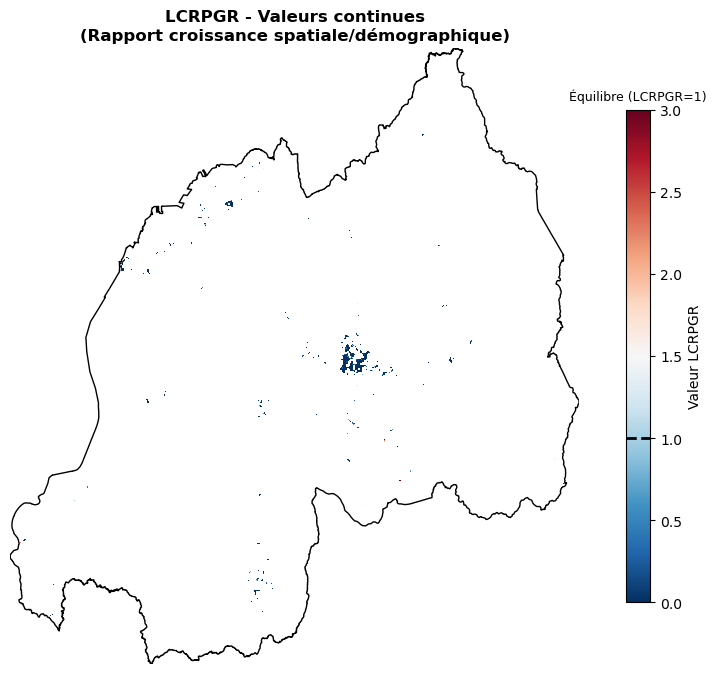

  Carte catégorielle sauvegardée: outputs\Carte_LCRPGR_Categorielle_Rwanda_2015-2025.png


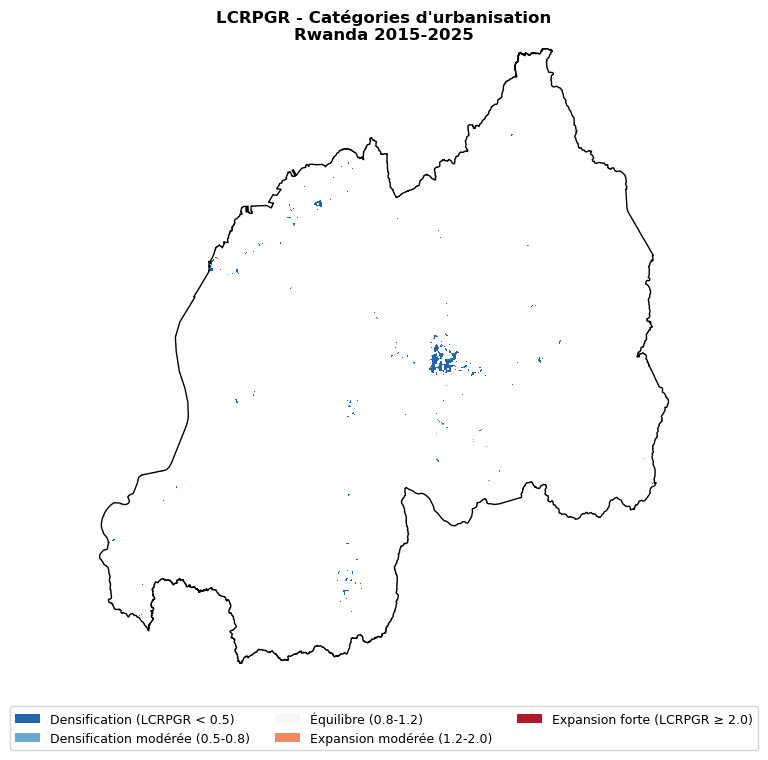

  Histogramme continu sauvegardé: outputs\Histogramme_LCRPGR_Continue_Rwanda.png


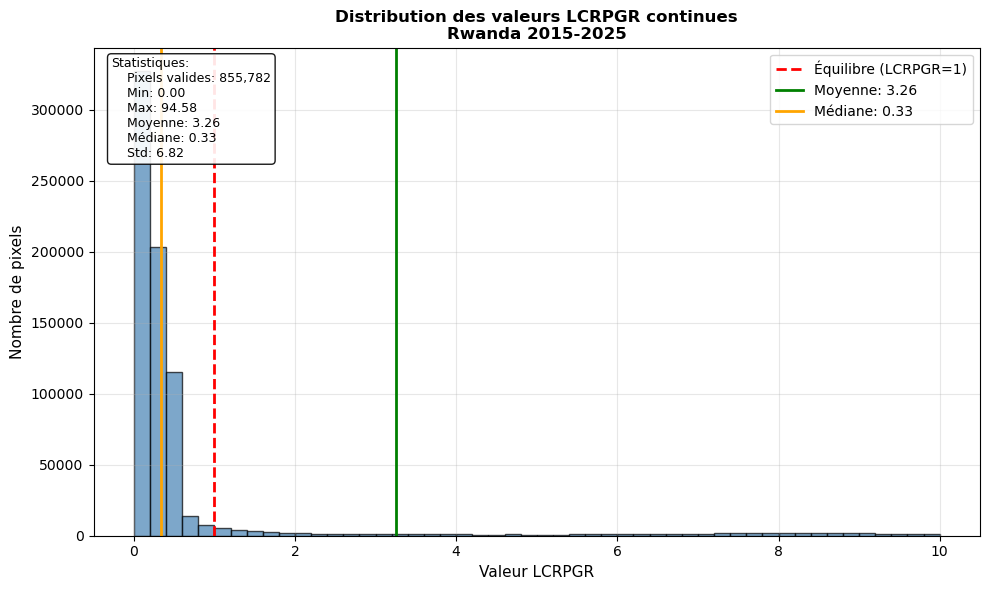

  Histogramme discret sauvegardé: outputs\Histogramme_LCRPGR_Discret_Rwanda.png


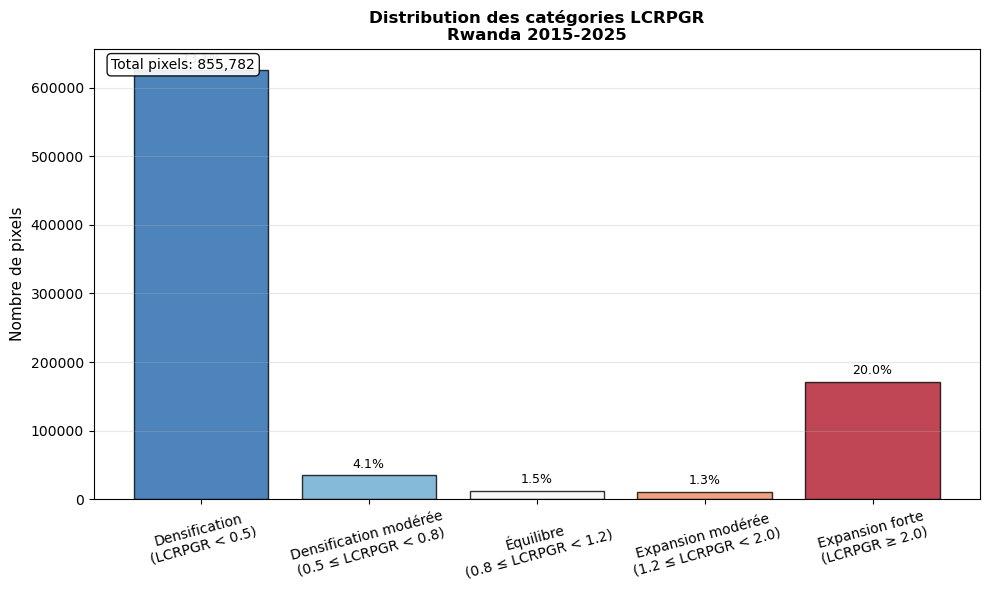


VISUALISATIONS TERMINÉES
Fichiers générés:
  1. outputs\Carte_LCRPGR_Continue_Rwanda_2015-2025.png
  2. outputs\Carte_LCRPGR_Categorielle_Rwanda_2015-2025.png
  3. outputs\Histogramme_LCRPGR_Continue_Rwanda.png
  4. outputs\Histogramme_LCRPGR_Discret_Rwanda.png


In [2]:
# ---- CALCUL ET CARTE RASTER DE L'INDICATEUR LCRPGR PAR PIXEL ----
print("\n" + "=" * 60)
print("CARTE RASTER DE L'INDICATEUR LCRPGR PAR PIXEL")
print("=" * 60)

try:
    
    # Ouvrir les rasters de surfaces bâties
    with rasterio.open(built_2015_path) as src_b15, rasterio.open(built_2025_path) as src_b25:
        # Vérifier les dimensions
        print(f"  Dimensions bâti 2015: {src_b15.shape}")
        print(f"  Dimensions bâti 2025: {src_b25.shape}")
        
        if src_b15.shape != src_b25.shape:
            print("  ATTENTION: Dimensions différentes pour bâti 2015 et 2025!")
            print("  On utilise le plus petit commun pour l'analyse")
            min_rows = min(src_b15.height, src_b25.height)
            min_cols = min(src_b15.width, src_b25.width)
            
            b15 = src_b15.read(1, window=((0, min_rows), (0, min_cols)))
            b25 = src_b25.read(1, window=((0, min_rows), (0, min_cols)))
            transform = src_b15.transform
            crs = src_b15.crs
        else:
            b15 = src_b15.read(1)
            b25 = src_b25.read(1)
            transform = src_b15.transform
            crs = src_b15.crs
    
    # Ouvrir les rasters de population
    with rasterio.open(pop_2015_path) as src_p15, rasterio.open(pop_2025_path) as src_p25:
        print(f"  Dimensions pop 2015: {src_p15.shape}")
        print(f"  Dimensions pop 2025: {src_p25.shape}")
        
        # Redimensionner la population pour correspondre au bâti
        if src_p15.shape != b15.shape:
            print(f"  Redimensionnement population pour correspondre au bâti...")
            from rasterio.warp import reproject, Resampling
            
            # Créer des arrays vides de la taille du bâti
            p15_resized = np.empty(b15.shape, dtype=np.float32)
            p25_resized = np.empty(b25.shape, dtype=np.float32)
            
            # Reprojecter/résample
            reproject(
                source=src_p15.read(1),
                destination=p15_resized,
                src_transform=src_p15.transform,
                src_crs=src_p15.crs,
                dst_transform=transform,
                dst_crs=crs,
                resampling=Resampling.bilinear
            )
            
            reproject(
                source=src_p25.read(1),
                destination=p25_resized,
                src_transform=src_p25.transform,
                src_crs=src_p25.crs,
                dst_transform=transform,
                dst_crs=crs,
                resampling=Resampling.bilinear
            )
            
            p15 = p15_resized
            p25 = p25_resized
        else:
            p15 = src_p15.read(1)
            p25 = src_p25.read(1)
    
    
    # Convertir en float pour les calculs
    b15 = b15.astype(np.float32)
    b25 = b25.astype(np.float32)
    p15 = p15.astype(np.float32)
    p25 = p25.astype(np.float32)
    
    # Gérer les valeurs nodata et négatives
    b15[b15 <= 0] = np.nan
    b25[b25 <= 0] = np.nan
    p15[p15 < 0] = np.nan
    p25[p25 < 0] = np.nan
    
    # Convertir surfaces bâties en km² (m² → km²)
    b15_km2 = b15 / 1_000_000
    b25_km2 = b25 / 1_000_000
    
    
    # Reprojecter gadm au CRS du raster
    gadm_proj = gadm.to_crs(crs)
    
    # Créer le masque
    from rasterio.features import geometry_mask
    shapes = [geom for geom in gadm_proj.geometry]
    mask = geometry_mask(shapes, transform=transform, 
                        out_shape=b15.shape, invert=True)
    
    # Appliquer le masque
    b15_km2[~mask] = np.nan
    b25_km2[~mask] = np.nan
    p15[~mask] = np.nan
    p25[~mask] = np.nan
    
    
    Y = 10  # Période 2015-2025
    
    # Calcul avec protection contre les divisions par zéro
    with np.errstate(divide='ignore', invalid='ignore'):
        # Taux de croissance spatiale
        spatial_rate = (b25_km2 - b15_km2) / (b15_km2 * Y)
        
        # Taux de croissance démographique
        pop_ratio = p25 / p15
        pop_ratio = np.where((pop_ratio > 0) & np.isfinite(pop_ratio), pop_ratio, np.nan)
        pop_rate = np.log(pop_ratio) / Y
        
        # LCRPGR
        lcrpgr = spatial_rate / pop_rate
    
    # Filtrer les valeurs extrêmes
    lcrpgr = np.where((lcrpgr > -100) & (lcrpgr < 100), lcrpgr, np.nan)
        
    valid_mask = ~np.isnan(lcrpgr)
    lcrpgr_valid = lcrpgr[valid_mask]
    
    print(f"  Pixels valides: {np.sum(valid_mask):,} / {lcrpgr.size:,}")
    print(f"  Min: {np.nanmin(lcrpgr_valid):.4f}")
    print(f"  Max: {np.nanmax(lcrpgr_valid):.4f}")
    print(f"  Moyenne: {np.nanmean(lcrpgr_valid):.4f}")
    print(f"  Médiane: {np.nanmedian(lcrpgr_valid):.4f}")
    print(f"  Std: {np.nanstd(lcrpgr_valid):.4f}")
    
    # Distribution par catégories
    categories = {
        'Très forte densification (< 0.2)': np.sum(lcrpgr_valid < 0.2),
        'Forte densification (0.2-0.5)': np.sum((lcrpgr_valid >= 0.2) & (lcrpgr_valid < 0.5)),
        'Densification modérée (0.5-0.8)': np.sum((lcrpgr_valid >= 0.5) & (lcrpgr_valid < 0.8)),
        'Équilibre (0.8-1.2)': np.sum((lcrpgr_valid >= 0.8) & (lcrpgr_valid < 1.2)),
        'Expansion modérée (1.2-2.0)': np.sum((lcrpgr_valid >= 1.2) & (lcrpgr_valid < 2.0)),
        'Forte expansion (2.0-5.0)': np.sum((lcrpgr_valid >= 2.0) & (lcrpgr_valid < 5.0)),
        'Expansion extrême (≥ 5.0)': np.sum(lcrpgr_valid >= 5.0)
    }
    
    print(f"\n  Distribution par catégories:")
    for cat, count in categories.items():
        percentage = (count / len(lcrpgr_valid)) * 100 if len(lcrpgr_valid) > 0 else 0
        print(f"    {cat}: {count:,} pixels ({percentage:.1f}%)")
    
    # ===========================================
    # 1. CARTE LCRPGR CONTINUE
    # ===========================================
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    im1 = ax1.imshow(lcrpgr, cmap='RdBu_r', vmin=0, vmax=3,
                    extent=rasterio.plot.plotting_extent(b15, transform=transform),
                    origin='upper')
    gadm_proj.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)
    ax1.set_title("LCRPGR - Valeurs continues\n(Rapport croissance spatiale/démographique)", 
                 fontsize=12, fontweight='bold')
    ax1.set_axis_off()
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
    cbar1.set_label("Valeur LCRPGR", fontsize=10)
    cbar1.ax.axhline(1, color='black', linewidth=2, linestyle='--')
    cbar1.ax.text(0.5, 1.02, 'Équilibre (LCRPGR=1)', 
                 transform=cbar1.ax.transAxes, ha='center', fontsize=9)
    
    # Sauvegarde carte continue
    output_path1 = os.path.join(output_dir, "Carte_LCRPGR_Continue_Rwanda_2015-2025.png")
    plt.savefig(output_path1, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Carte continue sauvegardée: {output_path1}")
    plt.show()
    plt.close(fig1)
    
    # ===========================================
    # 2. DISCÉTISATION EN CATÉGORIES
    # ===========================================
    # Créer des catégories pour la carte discrète
    lcrpgr_cat = np.full_like(lcrpgr, np.nan)
    lcrpgr_cat[lcrpgr < 0.5] = 1  # Densification
    lcrpgr_cat[(lcrpgr >= 0.5) & (lcrpgr < 0.8)] = 2  # Densification modérée
    lcrpgr_cat[(lcrpgr >= 0.8) & (lcrpgr < 1.2)] = 3  # Équilibre
    lcrpgr_cat[(lcrpgr >= 1.2) & (lcrpgr < 2.0)] = 4  # Expansion modérée
    lcrpgr_cat[lcrpgr >= 2.0] = 5  # Expansion forte
    
    from matplotlib.colors import ListedColormap
    colors = ['#2166ac', '#67a9cf', '#f7f7f7', '#ef8a62', '#b2182b']
    cmap_cat = ListedColormap(colors)
    
    # Carte LCRPGR discrète
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    im2 = ax2.imshow(lcrpgr_cat, cmap=cmap_cat, vmin=0.5, vmax=5.5,
                    extent=rasterio.plot.plotting_extent(b15, transform=transform),
                    origin='upper')
    gadm_proj.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)
    ax2.set_title("LCRPGR - Catégories d'urbanisation\nRwanda 2015-2025", 
                 fontsize=12, fontweight='bold')
    ax2.set_axis_off()
    
    # Légende
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2166ac', label='Densification (LCRPGR < 0.5)'),
        Patch(facecolor='#67a9cf', label='Densification modérée (0.5-0.8)'),
        Patch(facecolor='#f7f7f7', label='Équilibre (0.8-1.2)'),
        Patch(facecolor='#ef8a62', label='Expansion modérée (1.2-2.0)'),
        Patch(facecolor='#b2182b', label='Expansion forte (LCRPGR ≥ 2.0)')
    ]
    ax2.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=9)
    
    # Sauvegarde carte catégorielle
    output_path2 = os.path.join(output_dir, "Carte_LCRPGR_Categorielle_Rwanda_2015-2025.png")
    plt.savefig(output_path2, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Carte catégorielle sauvegardée: {output_path2}")
    plt.show()
    plt.close(fig2)
    
    # ===========================================
    # 3. HISTOGRAMME LCRPGR CONTINU
    # ===========================================
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    
    # Histogramme des valeurs continues (limité à 10 pour lisibilité)
    hist_max = min(np.nanmax(lcrpgr_valid), 10)
    bins_cont = np.linspace(0, hist_max, 51)
    
    ax3.hist(lcrpgr_valid[lcrpgr_valid <= hist_max], bins=bins_cont, 
            alpha=0.7, color='steelblue', edgecolor='black')
    
    # Lignes de référence
    ax3.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Équilibre (LCRPGR=1)')
    ax3.axvline(x=np.nanmean(lcrpgr_valid), color='green', linestyle='-', 
               linewidth=2, label=f'Moyenne: {np.nanmean(lcrpgr_valid):.2f}')
    ax3.axvline(x=np.nanmedian(lcrpgr_valid), color='orange', linestyle='-', 
               linewidth=2, label=f'Médiane: {np.nanmedian(lcrpgr_valid):.2f}')
    
    ax3.set_xlabel('Valeur LCRPGR', fontsize=11)
    ax3.set_ylabel('Nombre de pixels', fontsize=11)
    ax3.set_title('Distribution des valeurs LCRPGR continues\nRwanda 2015-2025', 
                 fontsize=12, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)
    
    # Ajouter statistiques
    stats_text = f"""Statistiques:
    Pixels valides: {np.sum(valid_mask):,}
    Min: {np.nanmin(lcrpgr_valid):.2f}
    Max: {np.nanmax(lcrpgr_valid):.2f}
    Moyenne: {np.nanmean(lcrpgr_valid):.2f}
    Médiane: {np.nanmedian(lcrpgr_valid):.2f}
    Std: {np.nanstd(lcrpgr_valid):.2f}"""
    
    ax3.text(0.02, 0.98, stats_text, transform=ax3.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    plt.tight_layout()
    
    # Sauvegarde histogramme continu
    output_path3 = os.path.join(output_dir, "Histogramme_LCRPGR_Continue_Rwanda.png")
    plt.savefig(output_path3, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Histogramme continu sauvegardé: {output_path3}")
    plt.show()
    plt.close(fig3)
    
    # ===========================================
    # 4. HISTOGRAMME LCRPGR DISCRET
    # ===========================================
    fig4, ax4 = plt.subplots(figsize=(10, 6))
    
    # Compter les pixels par catégorie
    cat_labels = ['Densification\n(LCRPGR < 0.5)', 
                  'Densification modérée\n(0.5 ≤ LCRPGR < 0.8)', 
                  'Équilibre\n(0.8 ≤ LCRPGR < 1.2)', 
                  'Expansion modérée\n(1.2 ≤ LCRPGR < 2.0)', 
                  'Expansion forte\n(LCRPGR ≥ 2.0)']
    
    cat_counts = [
        np.sum(lcrpgr_valid < 0.5),
        np.sum((lcrpgr_valid >= 0.5) & (lcrpgr_valid < 0.8)),
        np.sum((lcrpgr_valid >= 0.8) & (lcrpgr_valid < 1.2)),
        np.sum((lcrpgr_valid >= 1.2) & (lcrpgr_valid < 2.0)),
        np.sum(lcrpgr_valid >= 2.0)
    ]
    
    cat_percentages = [(count / np.sum(valid_mask)) * 100 for count in cat_counts]
    
    # Barres avec couleurs correspondant à la carte
    bars = ax4.bar(cat_labels, cat_counts, color=colors, alpha=0.8, edgecolor='black')
    
    # Ajouter les pourcentages sur les barres
    for i, (bar, percentage) in enumerate(zip(bars, cat_percentages)):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + max(cat_counts)*0.01,
                f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
    
    ax4.set_ylabel('Nombre de pixels', fontsize=11)
    ax4.set_title('Distribution des catégories LCRPGR\nRwanda 2015-2025', 
                 fontsize=12, fontweight='bold')
    ax4.tick_params(axis='x', rotation=15)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Ajouter le total
    ax4.text(0.02, 0.98, f'Total pixels: {np.sum(valid_mask):,}', 
            transform=ax4.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    plt.tight_layout()
    
    # Sauvegarde histogramme discret
    output_path4 = os.path.join(output_dir, "Histogramme_LCRPGR_Discret_Rwanda.png")
    plt.savefig(output_path4, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Histogramme discret sauvegardé: {output_path4}")
    plt.show()
    plt.close(fig4)
    
    print("\n" + "=" * 60)
    print("VISUALISATIONS TERMINÉES")
    print("=" * 60)
    print(f"Fichiers générés:")
    print(f"  1. {output_path1}")
    print(f"  2. {output_path2}")
    print(f"  3. {output_path3}")
    print(f"  4. {output_path4}")
    
except Exception as e:
    print(f"Erreur lors de la création de la carte LCRPGR: {e}")
    import traceback
    traceback.print_exc()


CALCUL ET VISUALISATION DE L'INDICATEUR LCRPGR

Données pour le calcul LCRPGR:
  Surfaces bâties 2015 (V_past): 532.04 km²
  Surfaces bâties 2025 (V_present): 786.51 km²
  Population 2015 (P_opt): 11,501,398 personnes
  Population 2025 (P_opt+n): 14,406,790 personnes
  Période (Y): 10 ans

Calcul LCRPGR global:
  Taux croissance spatiale: (786.51 - 532.04) / (532.04 × 10) = 0.047830
  Taux croissance démographique: ln(14,406,790/11,501,398) / 10 = 0.022523
  LCRPGR = 0.047830 / 0.022523 = 2.1236

INTERPRÉTATION (global):
  LCRPGR = 2.12 > 1
  → EXPANSION URBAINE RAPIDE
  La surface bâtie croît 2.12 fois plus vite que la population
  Phénomène d'étalement urbain dominant

VISUALISATION GRAPHIQUE DE L'INDICATEUR LCRPGR
Graphique LCRPGR sauvegardé: outputs\LCRPGR_Analyse_Rwanda_2015-2025.png


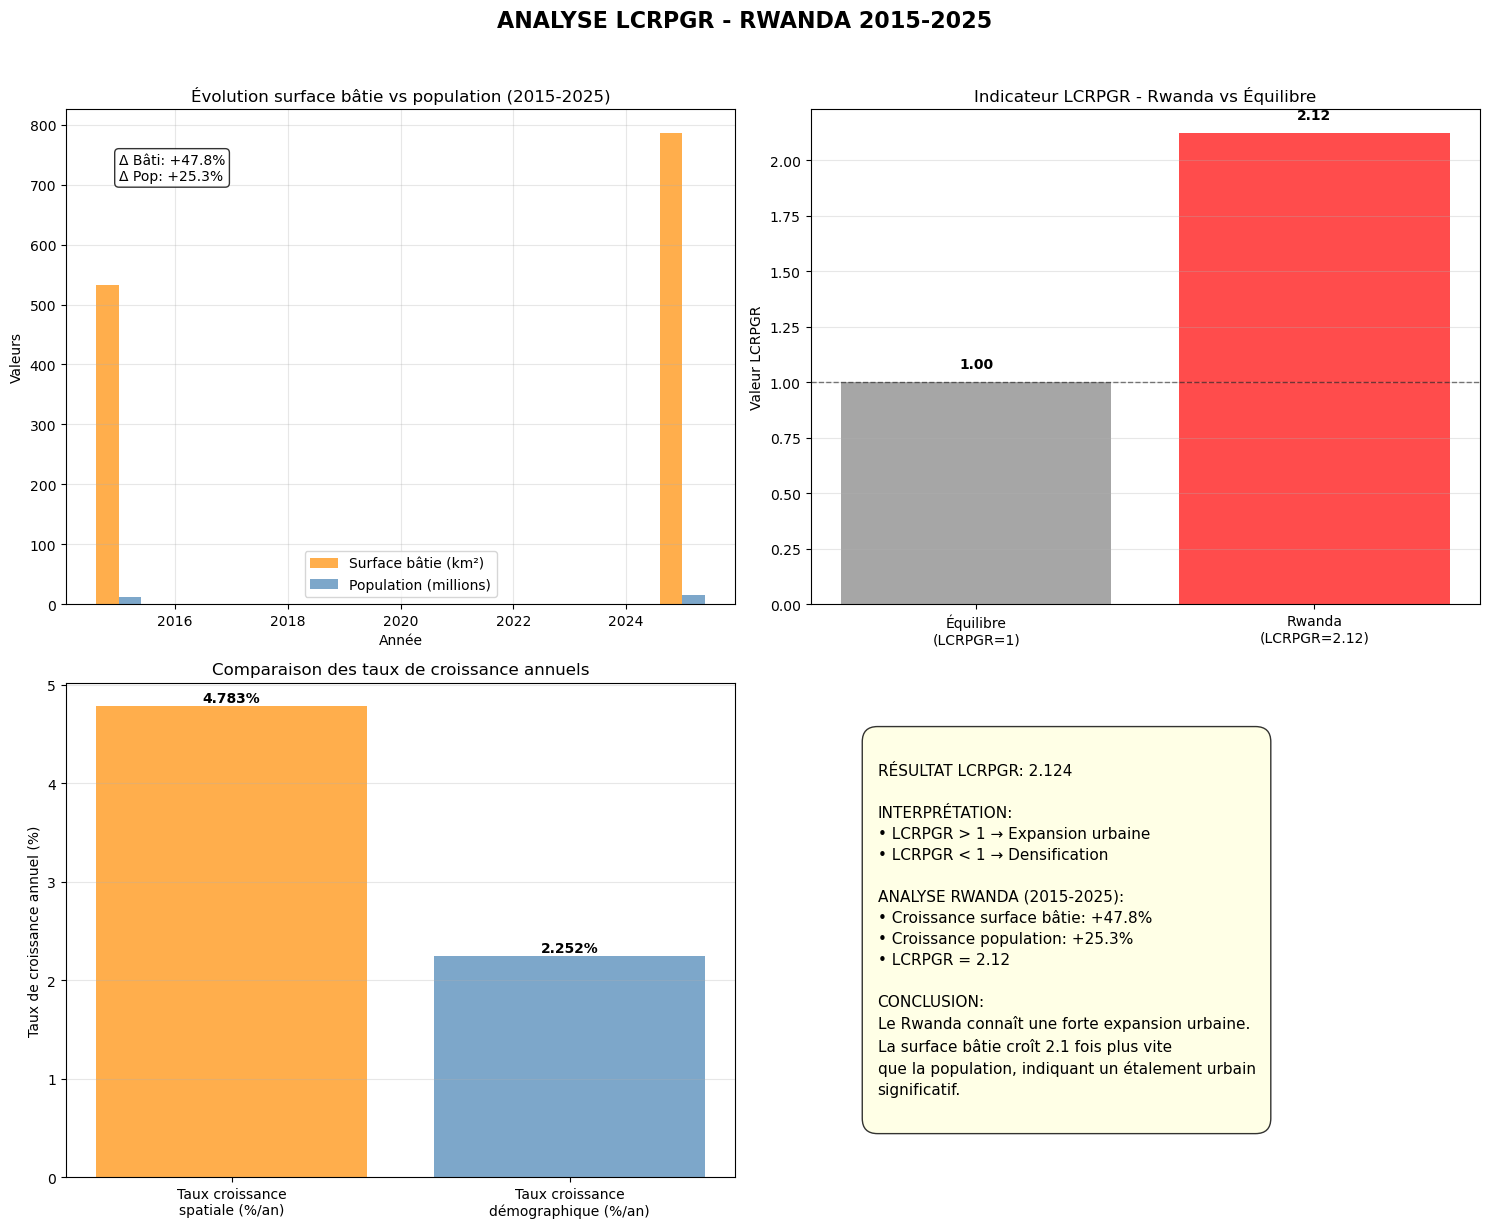


ANALYSE DÉTAILLÉE DES RÉSULTATS

1. CROISSANCE ABSOLUE (2015-2025):
   • Surface bâtie: 532.0 → 786.5 km²
     Δ = +254.5 km² (+47.8%)
   • Population: 11.50 → 14.41 millions
     Δ = +2.91 millions (+25.3%)

2. TAUX DE CROISSANCE ANNUELLE MOYENNE:
   • Surface bâtie: 4.783 %/an
   • Population: 2.252 %/an

3. INDICATEUR LCRPGR:
   • Valeur calculée: 2.124
   • Interprétation: 2.1x plus de croissance spatiale que démographique

4. IMPLICATIONS:
   • FORTE EXPANSION URBAINE
   • Étendue significative des zones bâties
   • Possible consommation d'espaces agricoles/naturels
   • Besoin d'une planification urbaine contrôlée

5. RECOMMANDATIONS:
   • Analyser la répartition spatiale de la croissance
   • Évaluer l'impact sur les terres agricoles
   • Planifier des infrastructures adaptées
   • Considérer des politiques de densification ciblée

ANALYSE TERMINÉE


In [3]:
# ---- CALCUL ET VISUALISATION DE L'INDICATEUR LCRPGR (CORRIGÉ) ----
print("\n" + "=" * 60)
print("CALCUL ET VISUALISATION DE L'INDICATEUR LCRPGR")
print("=" * 60)

# Récupérer les valeurs pour le calcul
V_2015 = stats_built_2015['sum'] / 1_000_000  # km²
V_2025 = stats_built_2025['sum'] / 1_000_000  # km²
P_2015 = stats_pop_2015['sum']  # personnes
P_2025 = stats_pop_2025['sum']  # personnes
Y = 10  # 2015-2025

print(f"\nDonnées pour le calcul LCRPGR:")
print(f"  Surfaces bâties 2015 (V_past): {V_2015:.2f} km²")
print(f"  Surfaces bâties 2025 (V_present): {V_2025:.2f} km²")
print(f"  Population 2015 (P_opt): {P_2015:,.0f} personnes")
print(f"  Population 2025 (P_opt+n): {P_2025:,.0f} personnes")
print(f"  Période (Y): {Y} ans")

# Calcul LCRPGR global
spatial_rate = (V_2025 - V_2015) / (V_2015 * Y)
pop_rate = np.log(P_2025 / P_2015) / Y
LCRPGR_global = spatial_rate / pop_rate

print(f"\nCalcul LCRPGR global:")
print(f"  Taux croissance spatiale: ({V_2025:.2f} - {V_2015:.2f}) / ({V_2015:.2f} × {Y}) = {spatial_rate:.6f}")
print(f"  Taux croissance démographique: ln({P_2025:,.0f}/{P_2015:,.0f}) / {Y} = {pop_rate:.6f}")
print(f"  LCRPGR = {spatial_rate:.6f} / {pop_rate:.6f} = {LCRPGR_global:.4f}")

print(f"\nINTERPRÉTATION (global):")
if LCRPGR_global > 1:
    print(f"  LCRPGR = {LCRPGR_global:.2f} > 1")
    print("  → EXPANSION URBAINE RAPIDE")
    print("  La surface bâtie croît 2.12 fois plus vite que la population")
    print("  Phénomène d'étalement urbain dominant")
else:
    print(f"  LCRPGR = {LCRPGR_global:.2f} < 1")
    print("  → DENSIFICATION URBAINE")

# ---- VISUALISATION SIMPLE DE L'INDICATEUR ----
print(f"\n" + "=" * 60)
print("VISUALISATION GRAPHIQUE DE L'INDICATEUR LCRPGR")
print("=" * 60)

# Créer un graphique simple pour l'indicateur
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Graphique de comparaison des croissances
years = [2015, 2025]
built_area = [V_2015, V_2025]
population = [P_2015/1_000_000, P_2025/1_000_000]  # en millions

ax1.bar([x-0.2 for x in years], built_area, width=0.4, label='Surface bâtie (km²)', color='darkorange', alpha=0.7)
ax1.bar([x+0.2 for x in years], population, width=0.4, label='Population (millions)', color='steelblue', alpha=0.7)
ax1.set_xlabel('Année')
ax1.set_ylabel('Valeurs')
ax1.set_title('Évolution surface bâtie vs population (2015-2025)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ajouter les pourcentages de croissance
built_growth = ((V_2025 - V_2015) / V_2015) * 100
pop_growth = ((P_2025 - P_2015) / P_2015) * 100
ax1.text(2015, max(built_area + population)*0.9, 
         f'Δ Bâti: +{built_growth:.1f}%\nΔ Pop: +{pop_growth:.1f}%',
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. Graphique du ratio LCRPGR
categories = ['Équilibre\n(LCRPGR=1)', 'Rwanda\n(LCRPGR=2.12)']
values = [1, LCRPGR_global]
colors = ['gray', 'red' if LCRPGR_global > 1 else 'blue']

bars = ax2.bar(categories, values, color=colors, alpha=0.7)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_ylabel('Valeur LCRPGR')
ax2.set_title('Indicateur LCRPGR - Rwanda vs Équilibre')
ax2.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Graphique des taux de croissance
growth_rates = [spatial_rate*100, pop_rate*100]  # en pourcentage
labels = ['Taux croissance\nspatiale (%/an)', 'Taux croissance\ndémographique (%/an)']

bars2 = ax3.bar(labels, growth_rates, color=['darkorange', 'steelblue'], alpha=0.7)
ax3.set_ylabel('Taux de croissance annuel (%)')
ax3.set_title('Comparaison des taux de croissance annuels')
ax3.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for bar, val in zip(bars2, growth_rates):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{val:.3f}%', ha='center', va='bottom', fontweight='bold')

# 4. Interprétation visuelle
ax4.axis('off')
interpretation_text = f"""
RÉSULTAT LCRPGR: {LCRPGR_global:.3f}

INTERPRÉTATION:
• LCRPGR > 1 → Expansion urbaine
• LCRPGR < 1 → Densification

ANALYSE RWANDA (2015-2025):
• Croissance surface bâtie: +{built_growth:.1f}%
• Croissance population: +{pop_growth:.1f}%
• LCRPGR = {LCRPGR_global:.2f}

CONCLUSION:
Le Rwanda connaît une forte expansion urbaine.
La surface bâtie croît {LCRPGR_global:.1f} fois plus vite
que la population, indiquant un étalement urbain
significatif.
"""

ax4.text(0.1, 0.5, interpretation_text, fontsize=11,
         verticalalignment='center', linespacing=1.5,
         bbox=dict(boxstyle="round,pad=1", facecolor="lightyellow", alpha=0.8))

plt.suptitle('ANALYSE LCRPGR - RWANDA 2015-2025', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Sauvegarde
output_path = os.path.join(output_dir, "LCRPGR_Analyse_Rwanda_2015-2025.png")
plt.savefig(output_path, bbox_inches='tight', dpi=300, facecolor='white')
print(f"Graphique LCRPGR sauvegardé: {output_path}")

plt.show()

# ---- ANALYSE DÉTAILLÉE ----
print(f"\n" + "=" * 60)
print("ANALYSE DÉTAILLÉE DES RÉSULTATS")
print("=" * 60)

print(f"\n1. CROISSANCE ABSOLUE (2015-2025):")
print(f"   • Surface bâtie: {V_2015:.1f} → {V_2025:.1f} km²")
print(f"     Δ = +{V_2025 - V_2015:.1f} km² (+{built_growth:.1f}%)")
print(f"   • Population: {P_2015/1_000_000:.2f} → {P_2025/1_000_000:.2f} millions")
print(f"     Δ = +{(P_2025 - P_2015)/1_000_000:.2f} millions (+{pop_growth:.1f}%)")

print(f"\n2. TAUX DE CROISSANCE ANNUELLE MOYENNE:")
print(f"   • Surface bâtie: {spatial_rate*100:.3f} %/an")
print(f"   • Population: {pop_rate*100:.3f} %/an")

print(f"\n3. INDICATEUR LCRPGR:")
print(f"   • Valeur calculée: {LCRPGR_global:.3f}")
print(f"   • Interprétation: {LCRPGR_global:.1f}x plus de croissance spatiale que démographique")

print(f"\n4. IMPLICATIONS:")
if LCRPGR_global > 1.5:
    print("   • FORTE EXPANSION URBAINE")
    print("   • Étendue significative des zones bâties")
    print("   • Possible consommation d'espaces agricoles/naturels")
    print("   • Besoin d'une planification urbaine contrôlée")
elif LCRPGR_global > 1:
    print("   • EXPANSION URBAINE MODÉRÉE")
    print("   • Croissance spatiale plus rapide que démographique")
    print("   • Étalement urbain à surveiller")
else:
    print("   • DENSIFICATION URBAINE")
    print("   • Utilisation intensive de l'espace existant")
    print("   • Moins de pression sur les espaces naturels")

print(f"\n5. RECOMMANDATIONS:")
print("   • Analyser la répartition spatiale de la croissance")
print("   • Évaluer l'impact sur les terres agricoles")
print("   • Planifier des infrastructures adaptées")
print("   • Considérer des politiques de densification ciblée")

print(f"\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)


ANALYSE RÉGIONALE DE L'INDICATEUR LCRPGR

Chargement des 5 régions/provinces du Rwanda
Noms des régions:
  1. Amajyaruguru
  2. Amajyepfo
  3. Iburasirazuba
  4. Iburengerazuba
  5. Umujyi wa Kigali

1. Calcul des statistiques régionales...
  Amajyaruguru: 155,441 pixels, LCRPGR moyen = 3.432
  Amajyepfo: 247,532 pixels, LCRPGR moyen = 2.839
  Iburasirazuba: 217,143 pixels, LCRPGR moyen = 3.341
  Iburengerazuba: 188,555 pixels, LCRPGR moyen = 3.705
  Umujyi wa Kigali: 47,111 pixels, LCRPGR moyen = 2.675

2. Classement des régions par LCRPGR:
  Iburengerazuba: 3.705 (EXPANSION)
  Amajyaruguru: 3.432 (EXPANSION)
  Iburasirazuba: 3.341 (EXPANSION)
  Amajyepfo: 2.839 (EXPANSION)
  Umujyi wa Kigali: 2.675 (EXPANSION)

3. Génération visualisations régionales...
  Graphique classement sauvegardé: outputs\LCRPGR_Classement_Regions.png


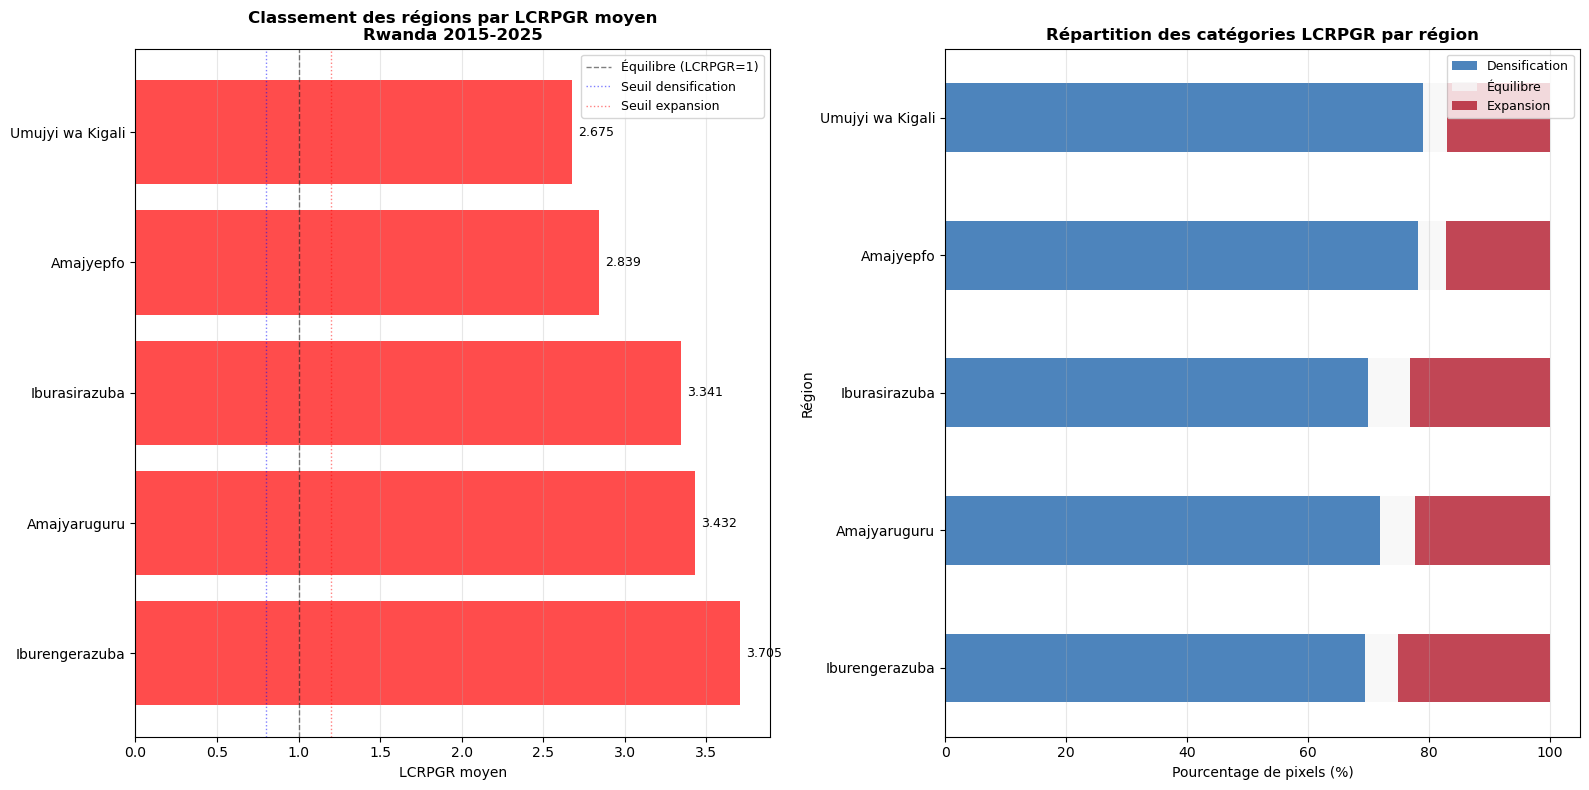


4. Génération carte choroplèthe...
  Carte régionale sauvegardée: outputs\LCRPGR_Carte_Regions.png


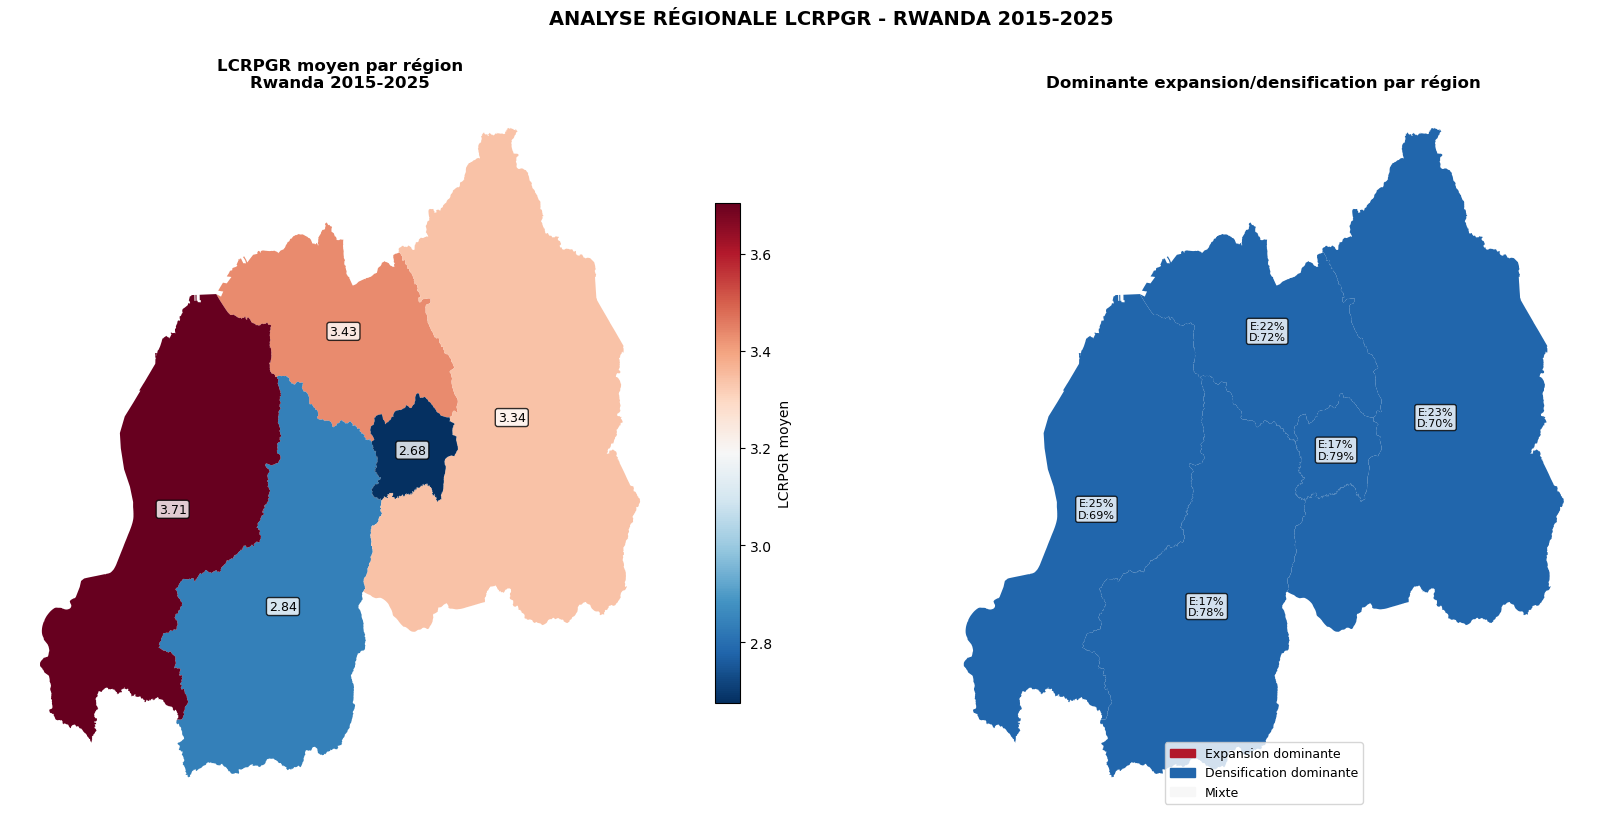


8. Export des données régionales...
  Données Excel exportées: outputs\LCRPGR_Analyse_Regionale.xlsx

SYNTHÈSE DE L'ANALYSE RÉGIONALE

RÉGIONS EN EXPANSION:
  Iburengerazuba: LCRPGR = 3.705 (25.1% expansion)
  Amajyaruguru: LCRPGR = 3.432 (22.3% expansion)
  Iburasirazuba: LCRPGR = 3.341 (23.1% expansion)
  Amajyepfo: LCRPGR = 2.839 (17.1% expansion)
  Umujyi wa Kigali: LCRPGR = 2.675 (17.0% expansion)

RÉGIONS EN DENSIFICATION:
  Iburengerazuba: LCRPGR = 3.705 (69.4% densification)
  Amajyaruguru: LCRPGR = 3.432 (71.9% densification)
  Iburasirazuba: LCRPGR = 3.341 (70.0% densification)
  Amajyepfo: LCRPGR = 2.839 (78.2% densification)
  Umujyi wa Kigali: LCRPGR = 2.675 (79.0% densification)

RÉPARTITION GLOBALE:
  Régions en expansion: 5 / 5
  Régions en densification: 0 / 5
  Régions équilibrées: 0 / 5

RECOMMANDATIONS STRATÉGIQUES:
  • Iburengerazuba: FORTE EXPANSION → Contrôler l'étalement urbain
  • Amajyaruguru: FORTE EXPANSION → Contrôler l'étalement urbain
  • Iburasirazuba: 

In [4]:
# ---- ANALYSE RÉGIONALE LCRPGR ----
print("\n" + "=" * 60)
print("ANALYSE RÉGIONALE DE L'INDICATEUR LCRPGR")
print("=" * 60)

# Charger les limites régionales
gadm1_path = os.path.join(data_dir, "gadm41_RWA_shp", "gadm41_RWA_1.shp")
try:
    gadm1 = gpd.read_file(gadm1_path)
    print(f"\nChargement des {len(gadm1)} régions/provinces du Rwanda")
    print("Noms des régions:")
    for idx, name in enumerate(gadm1['NAME_1']):
        print(f"  {idx+1}. {name}")
except Exception as e:
    print(f"Erreur chargement régions: {e}")
    gadm1 = None

if gadm1 is not None:
    # Reprojecter les régions au CRS du raster
    gadm1_proj = gadm1.to_crs(crs)
    
    print("\n1. Calcul des statistiques régionales...")
    
    # Initialiser dictionnaire pour stocker les résultats
    regional_stats = []
    
    for idx, region in gadm1_proj.iterrows():
        region_name = region['NAME_1']
        region_geom = region.geometry
        
        # Créer masque pour la région
        region_mask = geometry_mask([region_geom], transform=transform,
                                   out_shape=b15.shape, invert=True)
        
        # Extraire les valeurs LCRPGR pour cette région
        lcrpgr_region = lcrpgr.copy()
        lcrpgr_region[~region_mask] = np.nan
        
        # Statistiques
        valid_mask_region = ~np.isnan(lcrpgr_region)
        if np.sum(valid_mask_region) > 0:
            lcrpgr_region_valid = lcrpgr_region[valid_mask_region]
            
            # Calculer LCRPGR régional (moyenne pondérée)
            stats = {
                'Région': region_name,
                'Pixels_valides': int(np.sum(valid_mask_region)),
                'LCRPGR_moyen': float(np.nanmean(lcrpgr_region_valid)),
                'LCRPGR_médian': float(np.nanmedian(lcrpgr_region_valid)),
                'LCRPGR_std': float(np.nanstd(lcrpgr_region_valid)),
                'LCRPGR_min': float(np.nanmin(lcrpgr_region_valid)),
                'LCRPGR_max': float(np.nanmax(lcrpgr_region_valid)),
                'Pixels_densification': int(np.sum(lcrpgr_region_valid < 0.5)),
                'Pixels_équilibre': int(np.sum((lcrpgr_region_valid >= 0.5) & (lcrpgr_region_valid < 1.2))),
                'Pixels_expansion': int(np.sum(lcrpgr_region_valid >= 1.2))
            }
            
            # Pourcentages
            total_pixels = stats['Pixels_valides']
            stats['%_densification'] = (stats['Pixels_densification'] / total_pixels * 100) if total_pixels > 0 else 0
            stats['%_équilibre'] = (stats['Pixels_équilibre'] / total_pixels * 100) if total_pixels > 0 else 0
            stats['%_expansion'] = (stats['Pixels_expansion'] / total_pixels * 100) if total_pixels > 0 else 0
            
            regional_stats.append(stats)
            
            print(f"  {region_name}: {stats['Pixels_valides']:,} pixels, LCRPGR moyen = {stats['LCRPGR_moyen']:.3f}")
    
    # Convertir en DataFrame
    import pandas as pd
    df_regions = pd.DataFrame(regional_stats)
    
    # Trier par LCRPGR moyen
    df_regions_sorted = df_regions.sort_values('LCRPGR_moyen', ascending=False)
    
    print(f"\n2. Classement des régions par LCRPGR:")
    for idx, row in df_regions_sorted.iterrows():
        interpretation = "EXPANSION" if row['LCRPGR_moyen'] > 1.2 else "DENSIFICATION" if row['LCRPGR_moyen'] < 0.8 else "ÉQUILIBRE"
        print(f"  {row['Région']}: {row['LCRPGR_moyen']:.3f} ({interpretation})")
    
    # ===========================================
    # VISUALISATION 1: CLASSEMENT DES RÉGIONS
    # ===========================================
    print("\n3. Génération visualisations régionales...")
    
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Graphique 1: Classement LCRPGR
    regions = df_regions_sorted['Région']
    lcrpgr_values = df_regions_sorted['LCRPGR_moyen']
    
    bars1 = ax1.barh(regions, lcrpgr_values, 
                    color=['red' if x > 1.2 else 'blue' if x < 0.8 else 'gray' for x in lcrpgr_values],
                    alpha=0.7)
    
    ax1.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Équilibre (LCRPGR=1)')
    ax1.axvline(x=0.8, color='blue', linestyle=':', linewidth=1, alpha=0.5, label='Seuil densification')
    ax1.axvline(x=1.2, color='red', linestyle=':', linewidth=1, alpha=0.5, label='Seuil expansion')
    
    ax1.set_xlabel('LCRPGR moyen')
    ax1.set_title('Classement des régions par LCRPGR moyen\nRwanda 2015-2025', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Ajouter valeurs sur les barres
    for bar, val in zip(bars1, lcrpgr_values):
        width = bar.get_width()
        ax1.text(width + max(lcrpgr_values)*0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.3f}', va='center', fontsize=9)
    
    # Graphique 2: Répartition par catégories
    categories_data = df_regions_sorted[['Région', '%_densification', '%_équilibre', '%_expansion']]
    categories_data.set_index('Région', inplace=True)
    
    categories_data.plot(kind='barh', stacked=True, ax=ax2,
                        color=['#2166ac', '#f7f7f7', '#b2182b'], alpha=0.8)
    
    ax2.set_xlabel('Pourcentage de pixels (%)')
    ax2.set_title('Répartition des catégories LCRPGR par région', fontsize=12, fontweight='bold')
    ax2.legend(['Densification', 'Équilibre', 'Expansion'], fontsize=9)
    ax2.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    output_regions1 = os.path.join(output_dir, "LCRPGR_Classement_Regions.png")
    plt.savefig(output_regions1, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Graphique classement sauvegardé: {output_regions1}")
    plt.show()
    plt.close(fig1)
    
    # ===========================================
    # VISUALISATION 2: CARTE CHOROPLÈTHE
    # ===========================================
    print("\n4. Génération carte choroplèthe...")
    
    # Fusionner statistiques avec géométries
    gadm1_with_stats = gadm1_proj.merge(df_regions, left_on='NAME_1', right_on='Région')
    
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Carte 1: LCRPGR moyen
    gadm1_with_stats.plot(column='LCRPGR_moyen', cmap='RdBu_r', 
                         legend=True, ax=ax1, 
                         legend_kwds={'label': 'LCRPGR moyen', 'shrink': 0.7})
    
    # Ajouter les valeurs sur les régions
    for idx, row in gadm1_with_stats.iterrows():
        centroid = row.geometry.centroid
        ax1.text(centroid.x, centroid.y, f"{row['LCRPGR_moyen']:.2f}", 
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    ax1.set_title('LCRPGR moyen par région\nRwanda 2015-2025', fontsize=12, fontweight='bold')
    ax1.set_axis_off()
    
    # Carte 2: Dominante (expansion/densification)
    # Créer une colonne pour la dominante
    def get_dominant(row):
        if row['%_expansion'] > 50:
            return 'Expansion dominante'
        elif row['%_densification'] > 50:
            return 'Densification dominante'
        else:
            return 'Mixte'
    
    gadm1_with_stats['Dominante'] = gadm1_with_stats.apply(get_dominant, axis=1)
    
    # Palette pour dominantes
    from matplotlib.colors import ListedColormap
    dominant_colors = {'Expansion dominante': '#b2182b', 
                      'Densification dominante': '#2166ac', 
                      'Mixte': '#f7f7f7'}
    
    gadm1_with_stats['color'] = gadm1_with_stats['Dominante'].map(dominant_colors)
    gadm1_with_stats.plot(color=gadm1_with_stats['color'], ax=ax2)
    
    # Ajouter légende manuelle
    from matplotlib.patches import Patch
    legend_patches = [Patch(color=v, label=k) for k, v in dominant_colors.items()]
    ax2.legend(handles=legend_patches, loc='lower center', fontsize=9)
    
    # Ajouter les pourcentages
    for idx, row in gadm1_with_stats.iterrows():
        centroid = row.geometry.centroid
        text = f"E:{row['%_expansion']:.0f}%\nD:{row['%_densification']:.0f}%"
        ax2.text(centroid.x, centroid.y, text, 
                fontsize=8, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    ax2.set_title('Dominante expansion/densification par région', fontsize=12, fontweight='bold')
    ax2.set_axis_off()
    
    plt.suptitle('ANALYSE RÉGIONALE LCRPGR - RWANDA 2015-2025', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    output_regions2 = os.path.join(output_dir, "LCRPGR_Carte_Regions.png")
    plt.savefig(output_regions2, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"  Carte régionale sauvegardée: {output_regions2}")
    plt.show()
    plt.close(fig2)
    
    
    
    # ===========================================
    # EXPORT DES DONNÉES RÉGIONALES
    # ===========================================
    print("\n8. Export des données régionales...")
    
    # Export Excel avec mise en forme
    output_excel = os.path.join(output_dir, "LCRPGR_Analyse_Regionale.xlsx")
    with pd.ExcelWriter(output_excel, engine='openpyxl') as writer:
        df_regions.to_excel(writer, sheet_name='Statistiques', index=False)
        
        # Ajouter un résumé
        summary_data = {
            'Métrique': ['LCRPGR moyen national', 'Région plus expansive', 
                        'Région plus dense', 'Nombre de régions en expansion',
                        'Nombre de régions en densification'],
            'Valeur': [
                f"{LCRPGR_global:.3f}",
                f"{df_regions_sorted.iloc[0]['Région']} ({df_regions_sorted.iloc[0]['LCRPGR_moyen']:.3f})",
                f"{df_regions_sorted.iloc[-1]['Région']} ({df_regions_sorted.iloc[-1]['LCRPGR_moyen']:.3f})",
                f"{len(df_regions[df_regions['LCRPGR_moyen'] > 1.2])}",
                f"{len(df_regions[df_regions['LCRPGR_moyen'] < 0.8])}"
            ]
        }
        pd.DataFrame(summary_data).to_excel(writer, sheet_name='Résumé', index=False)
    
    print(f"  Données Excel exportées: {output_excel}")
    
    # ===========================================
    # SYNTHÈSE FINALE
    # ===========================================
    print("\n" + "=" * 60)
    print("SYNTHÈSE DE L'ANALYSE RÉGIONALE")
    print("=" * 60)
    
    # régions expansion
    top_expansion = df_regions_sorted.head(5)
    print(f"\nRÉGIONS EN EXPANSION:")
    for idx, row in top_expansion.iterrows():
        print(f"  {row['Région']}: LCRPGR = {row['LCRPGR_moyen']:.3f} ({row['%_expansion']:.1f}% expansion)")
    
    # régions densification
    top_densification = df_regions_sorted.tail(5)
    print(f"\nRÉGIONS EN DENSIFICATION:")
    for idx, row in top_densification.iterrows():
        print(f"  {row['Région']}: LCRPGR = {row['LCRPGR_moyen']:.3f} ({row['%_densification']:.1f}% densification)")
    
    # Analyse globale
    expansion_regions = len(df_regions[df_regions['LCRPGR_moyen'] > 1.2])
    densification_regions = len(df_regions[df_regions['LCRPGR_moyen'] < 0.8])
    balanced_regions = len(df_regions) - expansion_regions - densification_regions
    
    print(f"\nRÉPARTITION GLOBALE:")
    print(f"  Régions en expansion: {expansion_regions} / {len(df_regions)}")
    print(f"  Régions en densification: {densification_regions} / {len(df_regions)}")
    print(f"  Régions équilibrées: {balanced_regions} / {len(df_regions)}")
    
    # Recommandations par région
    print(f"\nRECOMMANDATIONS STRATÉGIQUES:")
    for region_name in df_regions_sorted.head(5)['Région']:
        region_data = df_regions[df_regions['Région'] == region_name].iloc[0]
        if region_data['LCRPGR_moyen'] > 2.0:
            print(f"  • {region_name}: FORTE EXPANSION → Contrôler l'étalement urbain")
        elif region_data['LCRPGR_moyen'] > 1.2:
            print(f"  • {region_name}: EXPANSION MODÉRÉE → Planifier croissance")
    
    for region_name in df_regions_sorted.tail(5)['Région']:
        region_data = df_regions[df_regions['Région'] == region_name].iloc[0]
        if region_data['LCRPGR_moyen'] < 0.5:
            print(f"  • {region_name}: FORTE DENSIFICATION → Améliorer infrastructures")
        elif region_data['LCRPGR_moyen'] < 0.8:
            print(f"  • {region_name}: DENSIFICATION MODÉRÉE → Optimiser espace")
    
    print("\n" + "=" * 60)
    print("ANALYSE RÉGIONALE TERMINÉE")
    print("=" * 60)
    
else:
    print("Impossible de charger les données régionales")

print("\n" + "=" * 60)
print("ANALYSE COMPLÈTE LCRPGR - RWANDA 2015-2025")
print("=" * 60)